In [2]:
user = "Alex"
pathtorepo = "C:\\Users\\" *user *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\bifurcation_clear\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\bifurcation_clear`


In [3]:
using BifurcationKit, LinearAlgebra, Plots, Parameters
const BK = BifurcationKit

BifurcationKit

In [7]:
Pkg.status()

Status `C:\Users\Alex\Desktop\dynamical-systems\env\bifurcation_clear\Project.toml`


  [0f109fa4] BifurcationKit v0.2.9
  [0e751702] HclinicBifurcationKit v0.1.0 `https://github.com/bifurcationkit/HclinicBifurcationKit.jl#main`
  [d96e819e] Parameters v0.12.3
  [91a5bcdd] Plots v1.38.17
  [37e2e46d] LinearAlgebra


In [8]:
œÑ_ = 0.013; œÑD_ = 0.07993;  œÑy_ = 3.3; J_ = 3.07; Œ≤_ = 0.300
xthr_ = 0.75; ythr_ = 0.4
Œ±_ = 1.58; ŒîU0_ = 0.305
I0_ = -1.7064; U0_ = 0.265; 

@inbounds function TM_bk!(du, u, p, t = 0)
    U_ = p[8] + p[9] / ( 1.0 + exp( -50.0 * (u[3] - p[7]) ) )
    œÉ = 1.0 / ( 1.0 + exp( -20.0 * (u[2]-p[6]) ) )
    g(E, x, y, p, U_) = log( 1.0 + exp( (p[5] * U_ * x * E + p[11]  ) / (p[1]) ) )
    
    du[1] = (-u[1] + p[1] * g(u[1], u[2], u[3], p, U_) ) / p[2]
    du[2] = (1.0 - u[2]) / p[3] - U_*u[2]*u[1]
    du[3] = (-u[3])/p[4] + p[10] * œÉ
    
    return du
end

TM_bk! (generic function with 2 methods)

In [9]:
TM_bk(u, p) = TM_bk!(similar(u), u, p, 0)

p_tm = (Œ± = Œ±_, œÑ = œÑ_, œÑD = œÑD_, œÑy = œÑy_, J = J_, xthr = xthr_, ythr = ythr_, U0 = U0_, ŒîU0 = ŒîU0_, Œ≤ = Œ≤_, I0 = I0_)
fp0 = [ 8.34581,  0.738495,  0.438299];

prob =  BifurcationProblem(TM_bk, fp0, p_tm, (@lens _.I0))

opt_new = NewtonPar(maxIter = 3, tol = 1e-6)
pmax, pmin = 0.0, -1.74

opts_con = ContinuationPar(pMin = pmin, pMax = pmax,
                            ds = 0.001, dsmin = 1e-5, dsmax = 0.1,
                            nev = 3, detectBifurcation = 3, newtonOptions  = opt_new,
                            maxSteps  = 300, nInversion = 6)

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 1.0e-5
  dsmax: Float64 0.1
  ds: Float64 0.001
  a: Float64 0.5
  pMin: Float64 -1.74
  pMax: Float64 0.0
  maxSteps: Int64 300
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  Œ∑: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 1
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  tolStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 3
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 6
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


In [10]:
br = continuation(prob, PALC(), opts_con)

 ‚îå‚îÄ Curve type: EquilibriumCont
 ‚îú‚îÄ Number of points: 52
 ‚îú‚îÄ Type of vectors: Vector{Float64}
 ‚îú‚îÄ Parameter I0 starts at -1.7064, ends at 0.0
 ‚îú‚îÄ Algo: PALC
 ‚îî‚îÄ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1,     hopf at I0 ‚âà -1.10653295 ‚àà (-1.10654404, -1.10653295), |Œ¥p|=1e-05, [converged], Œ¥ = (-2, -2), step =  35, eigenelements in eig[ 36], ind_ev =   2
- #  2, endpoint at I0 ‚âà +0.00000000,                                                                     step =  51


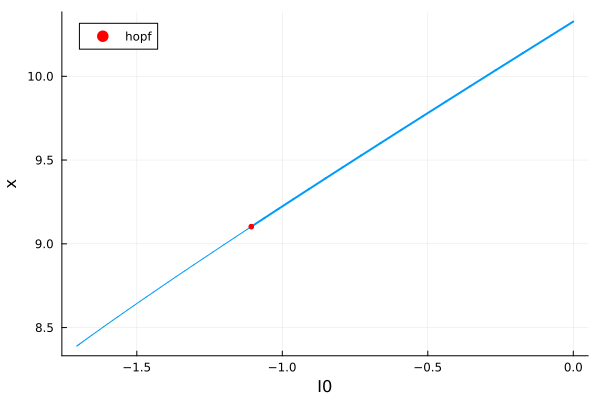

In [11]:
plot(br)

In [12]:
hp_codim2_1 = continuation(br, 1, (@lens _.U0),
    ContinuationPar(opts_con, pMin = 0.0, pMax = 0.4,
        ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
    # detection of codim 2 bifurcations with bisection
    detectCodim2Bifurcation = 2,
    # tell to start the Hopf problem using eigen elements: compute left eigenvector
    startWithEigen = true,
    # we update the Hopf problem at every continuation step
    updateMinAugEveryStep = 1,
    # compute both sides of the initial condition
    bothside = true,
    verbosity = 3
    )

‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ PALC ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ



‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ  INITIAL GUESS   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚ñ∂ convergence of initial guess = OK

‚îÄ‚îÄ‚ñ∂ parameter = 0.265, initial step

‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ INITIAL TANGENT  ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ


‚îÄ‚îÄ‚ñ∂ convergence of the initial guess = OK

‚îÄ‚îÄ‚ñ∂ parameter = 0.26500666666666667, initial step (bis)


Predictor:  Secant


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 0 
Step size = 1.0000e-03
Parameter 

U0 = 2.6500e-01 ‚ü∂  2.6508e-01 [guess]


‚îÄ‚îÄ> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6500e-01 ‚ü∂  2.6508e-01


‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (16.201638308453745, -0.1554443903466805, 0)
              ‚îÄ‚îÄ> (16.204670354929423, -0.15536291725154225, 0)


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 1 
Step size = 1.2222e-03
Parameter U0 = 2.6508e-01 ‚ü∂  2.6517e-01 [guess]
‚îÄ‚îÄ> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6508e-01 ‚ü∂  2.6517e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (16.204670354929423, -0.15536291725154225, 0)
              ‚îÄ‚îÄ> (16.20837571399167, -0.1552634966422905, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 2 
Step size = 1.4938e-03
Parameter U0 = 2.6517e-01 ‚ü∂  2.6528e-01 [guess]
‚îÄ‚îÄ> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6517e-01 ‚ü∂  2.6528e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secan

Predictor:  Secant
‚îÄ‚îÄ> Event values: (16.31198471593426, -0.15251597799842095, 0)
              ‚îÄ‚îÄ> (16.339519778185426, -0.15179574340985252, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 12 
Step size = 1.1112e-02
Parameter U0 = 2.6866e-01 ‚ü∂  2.6959e-01 [guess]
‚îÄ‚îÄ> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6866e-01 ‚ü∂  2.6961e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (16.339519778185426, -0.15179574340985252, 0)
              ‚îÄ‚îÄ> (16.373164091031377, -0.15092092660431294, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 13 
Step size = 1.3582e-02
Parameter U0 = 2.6961e-01 ‚ü∂  2.7078e-01 [guess]
‚îÄ‚îÄ> Step C

Parameter U0 = 2.7884e-01 ‚ü∂  2.8089e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.7884e-01 ‚ü∂  2.8101e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (16.65630484652338, -0.14373425023033737, 0)
              ‚îÄ‚îÄ> (16.712951411864417, -0.14231869995337892, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 20 
Step size = 1.9830e-02
Parameter U0 = 2.8101e-01 ‚ü∂  2.8330e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.8101e-01 ‚ü∂  2.8344e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (16.712951411864417, -0.14231869995337892, 0)
              ‚îÄ‚îÄ> (16.77268283429139, -0.14082602193677074, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

U0 = 3.1872e-01 ‚ü∂  3.2810e-01 [guess]
Newton correction failed
Halve ds = 0.014476301864377178
Predictor:  Secant
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 28 
Step size = 1.4476e-02
Parameter U0 = 3.1872e-01 ‚ü∂  3.2341e-01 [guess]
‚îÄ‚îÄ> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 3.1872e-01 ‚ü∂  3.2531e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (17.28759204932974, -0.12608057451700472, 0)
              ‚îÄ‚îÄ> (17.327903430448444, -0.12411357189103263, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 29 
Step size = 1.4476e-02
Parameter U0 = 3.2531e-01 ‚ü∂  3.3186e-01 [guess]
‚îÄ‚îÄ> Step Converged in 3 Nonlinear Iteration(s)
Pa

U0 = 3.4979e-01 ‚ü∂  3.5442e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.4979e-01 ‚ü∂  3.5378e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (17.363743511505614, -0.11759085679477477, 0)
              ‚îÄ‚îÄ> (17.35447270811856, -0.11657954832219306, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 34 
Step size = 4.4929e-03
Parameter U0 = 3.5378e-01 ‚ü∂  3.5779e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.5378e-01 ‚ü∂  3.5719e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (17.35447270811856, -0.11657954832219306, 0)
              ‚îÄ‚îÄ> (17.343466785225264, -0.11571418762805533, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

Step size = 7.7149e-03
Parameter U0 = 3.8123e-01 ‚ü∂  3.8386e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.8123e-01 ‚ü∂  3.8372e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (17.19177038070574, -0.10940155656267958, 0)
              ‚îÄ‚îÄ> (17.169049679504848, -0.10870161009646974, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 45 
Step size = 8.1436e-03
Parameter U0 = 3.8372e-01 ‚ü∂  3.8635e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.8372e-01 ‚ü∂  3.8622e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (17.169049679504848, -0.10870161009646974, 0)
              ‚îÄ‚îÄ> (17.144986723397395, -0.10798608129547768, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ PALC ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ  INITIAL GUESS   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚ñ∂ convergence of initial guess = OK

‚îÄ‚îÄ‚ñ∂ parameter = 0.265, initial step

‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ INITIAL TANGENT  ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚ñ∂ convergence of the initial guess = OK

‚îÄ‚îÄ‚ñ∂ parameter = 0.26499333333333336, initial step (bis)
Predictor:  Secant
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 0 
Step size = -1.0000e-03
Parameter U0 = 2.6500e-01 ‚ü∂  2.64

Predictor:  Secant
‚îÄ‚îÄ> Event values: (16.178069271216348, -0.15607914581221563, 0)
              ‚îÄ‚îÄ> (16.169798547333926, -0.156302732639992, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 6 
Step size = -3.3335e-03
Parameter U0 = 2.6421e-01 ‚ü∂  2.6396e-01 [guess]
‚îÄ‚îÄ> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6421e-01 ‚ü∂  2.6396e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (16.169798547333926, -0.156302732639992, 0)
              ‚îÄ‚îÄ> (16.159689160732153, -0.15657661341265694, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 7 
Step size = -4.0743e-03
Parameter U0 = 2.6396e-01 ‚ü∂  2.6366e-01 [guess]
‚îÄ‚îÄ> Step Conv

Parameter U0 = 2.5513e-01 ‚ü∂  2.5382e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (15.742765428672016, -0.16850795782194533, 0)
              ‚îÄ‚îÄ> (15.670185203639747, -0.17072634416324017, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 19 
Step size = -2.5187e-02
Parameter U0 = 2.5382e-01 ‚ü∂  2.5244e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.5382e-01 ‚ü∂  2.5250e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (15.670185203639747, -0.17072634416324017, 0)
              ‚îÄ‚îÄ> (15.593541298860375, -0.17311894751436419, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Con


‚îÄ‚îÄ> Event values: (14.001000455964112, -0.23624564004579976, 0)
              ‚îÄ‚îÄ> (13.749500319191485, -0.24857622187407757, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 31 
Step size = -8.6622e-02
Parameter U0 = 2.3363e-01 ‚ü∂  2.3201e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.3363e-01 ‚ü∂  2.3225e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (13.749500319191485, -0.24857622187407757, 0)
              ‚îÄ‚îÄ> (13.483823311405754, -0.26212305603173186, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 32 
Step size = -9.1434e-02
Parameter U0 = 2.3225e-01 ‚ü∂  2.3079e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 N

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 42 
Step size = -1.0000e-01
Parameter U0 = 2.2314e-01 ‚ü∂  2.2171e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.2314e-01 ‚ü∂  2.2122e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (10.457819856800302, -0.1136558631022988, 0)
              ‚îÄ‚îÄ> (10.15958472464819, 0.02916116952953407, 0)


‚îÄ‚îÄ> Event detected before p = 0.22121769599317634
‚îÄ‚îÄ‚îÄ‚îÄ> Entering [Event], indicator of 2 last events = ((2, 0), (1, 0))
‚îÄ‚îÄ‚îÄ‚îÄ> [Bisection] initial ds = -0.1
‚îÄ‚îÄ‚îÄ‚îÄ> [Bisection] state.ds = 0.1
‚îÄ‚îÄ> eve (initial) (10.457819856800302, -0.1136558631022988, 0) ‚îÄ‚îÄ> (10.15958472464819, 0.02916116952953407, 0)

‚îÄ‚îÄ> eigvals = 


-1.363828477929374e-7 - 10.159584797372556im
-1.363828477929374e-7 + 10.159584797372556im
-0.4328867344594442 + 0.0im

‚îÄ‚îÄ‚îÄ‚îÄ> eve (current) (10.15958472464819, 0.02916116952953407, 0) ‚îÄ‚îÄ> (10.15958472464819, 0.02916116952953407, 0)
‚îÄ‚îÄ‚îÄ‚îÄ> eigvals = 
-1.363828477929374e-7 - 10.159584797372556im
-1.363828477929374e-7 + 10.159584797372556im
-0.4328867344594442 + 0.0im


‚îÄ‚îÄ‚îÄ‚îÄ> 0 - [Bisection] (n1, n_current, n2) = ((1, 0), (2, 0), (2, 0))
			ds = 0.05, p = 0.22121769599317634, #reverse = 0
‚îÄ‚îÄ‚îÄ‚îÄ> event ‚àà (0.22121769599317634, 0.22313517368663638), precision = 1.917E-03
Predictor:  Secant

‚îÄ‚îÄ‚îÄ‚îÄ> eve (current) (10.15958472464819, 0.02916116952953407, 0) ‚îÄ‚îÄ> (10.308009624783864, -0.044118089360172086, 0)
‚îÄ‚îÄ‚îÄ‚îÄ> eigvals = 
-5.7586602153492095e-11 - 10.308009624809888im
-5.7586602153492095e-11 + 10.308009624809888im
-0.4901597156240403 + 0.0im
‚îÄ‚îÄ‚îÄ‚îÄ> 1 - [Bisection] (n1, n_current, n2) = ((1, 0), (1, 0), (2, 0))
			ds = -0.025, p = 0.22223638812307098, #reverse = 1
‚îÄ‚îÄ‚îÄ‚îÄ> event ‚àà (0.22121769599317634, 0.22223638812307098), precision = 1.019E-03
Predictor:  Secant

‚îÄ‚îÄ‚îÄ‚îÄ> eve (current) (10.308009624783864, -0.044118089360172086, 0) ‚îÄ‚îÄ> (10.23367192737185, -0.007569391075105125, 0)
‚îÄ‚îÄ‚îÄ‚îÄ> eigvals = 
-9.703349235223868e-14 - 10.23367192737191im
-9.703349235223868e-14 + 10.23367192737191im
-0

‚îÄ‚îÄ‚îÄ‚îÄ> Found at p = 0.22163354833461535 ‚àà (0.22163354833461535, 0.22163757748651672), 
			  Œ¥n = (1, 0), from p = 0.22121769599317634
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
‚îÄ‚îÄ‚îÄ‚îÄ> Stopping reason:
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ> isnothing(next)           = false
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ> |ds| < dsminBisection     = false
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ> step >= maxBisectionSteps = false
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ> n_inversion >= nInversion = true
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ> eventlocated              = false
‚îÄ‚îÄ‚îÄ‚îÄ> Leaving [Loc-Bif]
!! Continuous user point at p ‚âà 0.22163354833461535 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 43 
Step size = -1.0000e-01
Parameter U0 = 2.2163e-01 ‚ü∂  2.1957e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.2163e-01 ‚ü∂  2.19

Step size = -1.0000e-01
Parameter U0 = 1.8986e-01 ‚ü∂  1.8847e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8986e-01 ‚ü∂  1.8858e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0


Predictor:  Secant
‚îÄ‚îÄ> Event values: (5.798330432807205, 0.5323760321510023, 0)
              ‚îÄ‚îÄ> (5.496154705355952, 0.5642065509961447, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 59 
Step size = -1.0000e-01
Parameter U0 = 1.8858e-01 ‚ü∂  1.8729e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8858e-01 ‚ü∂  1.8740e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (5.496154705355952, 0.5642065509961447, 0)
              ‚îÄ‚îÄ> (5.192831534536277, 0.6015743532289068, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 60 
Step size = -1.0000e-01
Parameter U0 = 1.8740e-01 ‚ü∂  1.8623e-01 [guess]
‚îÄ‚îÄ> Step Converged 


‚îÄ‚îÄ> Event values: (2.726725398844056, 1.530107291901711, 0)
              ‚îÄ‚îÄ> (2.4140519861833303, 1.8907196564371098, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 69 
Step size = -1.0000e-01
Parameter U0 = 1.8109e-01 ‚ü∂  1.8071e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8109e-01 ‚ü∂  1.8077e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (2.4140519861833303, 1.8907196564371098, 0)
              ‚îÄ‚îÄ> (2.1005923233229327, 2.4281370868888352, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 70 
Step size = -1.0000e-01
Parameter U0 = 1.8077e-01 ‚ü∂  1.8045e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear I

-2.113144560592431e-11 - 0.10786317378284965im
-2.113144560592431e-11 + 0.10786317378284965im
-0.303038910538584 + 0.0im
‚îÄ‚îÄ‚îÄ‚îÄ> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (1, 0))
			ds = 0.05, p = 0.17988857781847814, #reverse = 0
‚îÄ‚îÄ‚îÄ‚îÄ> event ‚àà (0.17988857781847814, 0.1798943567217476), precision = 5.779E-06
Predictor:  Secant

‚îÄ‚îÄ‚îÄ‚îÄ> eve (current) (-0.10786317059775413, 847.0170880839596, 0) ‚îÄ‚îÄ> (0.05025229060228106, 3931.2523878961765, 0)
‚îÄ‚îÄ‚îÄ‚îÄ> eigvals = 
-4.415906618154158e-7 - 0.050276296264795566im
-4.415906618154158e-7 + 0.050276296264795566im
-0.3030397304663246 + 0.0im
‚îÄ‚îÄ‚îÄ‚îÄ> 1 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (1, 0))
			ds = -0.025, p = 0.1798869157216808, #reverse = 1
‚îÄ‚îÄ‚îÄ‚îÄ> event ‚àà (0.1798869157216808, 0.17988857781847814), precision = -1.662E-06
Predictor:  Secant

‚îÄ‚îÄ‚îÄ‚îÄ> eve (current) (0.05025229060228106, 3931.2523878961765, 0) ‚îÄ‚îÄ> (-0.028804529999009898, 10353.281659575014, 0)


 ‚îå‚îÄ Curve type: HopfCont
 ‚îú‚îÄ Number of points: 131
 ‚îú‚îÄ Type of vectors: Vector{Float64}
 ‚îú‚îÄ Parameter U0 starts at 0.1798874870608784, ends at 0.4
 ‚îú‚îÄ Algo: PALC
 ‚îî‚îÄ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ‚âà +0.17988749,                                                                     step =   0
- #  2,       bt at U0 ‚âà +0.17988749 ‚àà (+0.17988744, +0.17988749), |Œ¥p|=5e-08, [converged], Œ¥ = ( 0,  0), step =   0, eigenelements in eig[  1], ind_ev =   0
- #  3,       gh at U0 ‚âà +0.22163355 ‚àà (+0.22163355, +0.22163758), |Œ¥p|=4e-06, [converged], Œ¥ = ( 0,  0), step =  34, eigenelements in eig[ 35], ind_ev =   0
- #  4, endpoint at U0 ‚âà +0.40000000,                                                                     step = 130


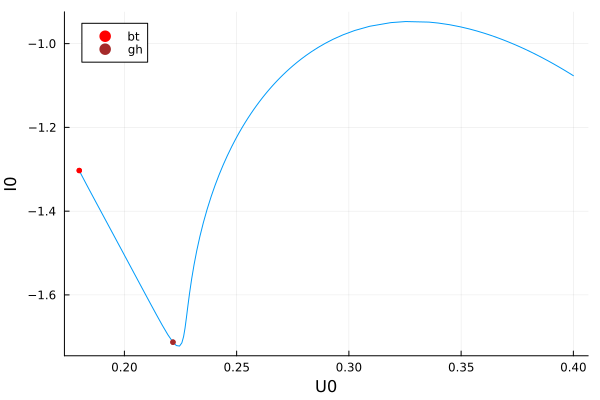

In [13]:
plot(hp_codim2_1)

In [14]:
sn_codim2_1 = continuation(hp_codim2_1, 2,
    ContinuationPar(opts_con, pMin = 0.0, pMax = 0.4,
        ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
    # detection of codim 2 bifurcations with bisection
    detectCodim2Bifurcation = 2,
    # tell to start the Hopf problem using eigen elements: compute left eigenvector
    startWithEigen = true,
    # we update the Hopf problem at every continuation step
    updateMinAugEveryStep = 1,
    # compute both sides of the initial condition
    bothside = true,
    verbosity = 3
    )

--> Considering bifurcation point:


- #  2,       bt at p ‚âà +0.17988749 ‚àà (+0.17988744, +0.17988749), |Œ¥p|=5e-08, [converged], Œ¥ = ( 0,  0), step =   0, eigenelements in eig[  1], ind_ev =   0
‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚ñ∂ Bogdanov-Takens Normal form computation


‚îÄ‚îÄ‚îÄ‚îÄ‚ñ∂ eigenvalues = ComplexF64[-2.9036862215158724e-7 - 0.075219043021921im, -2.9036862215158724e-7 + 0.075219043021921im]


‚îå Warning: G == I(2) is not valid. We built a basis such that G = [0.9999986572266407 1.0842021724855044e-18; 8.250068551772866e-5 0.9999999999999999]
‚îî @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\DlOaK\src\codim2\NormalForms.jl:170


(a = -21.331957517236233, b = -0.8862097979717625)


‚îå Warning: G is not close to the Jordan block of size 2. We built a basis such that G = [9.211229457798446e-5 1.0000000841090653; -0.005659426735690761 -5.1677041983329465e-6]. The norm of the difference is 0.005659426735690761
‚îî @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\DlOaK\src\codim2\NormalForms.jl:173


‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ PALC ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ



‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ  INITIAL GUESS   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚ñ∂ convergence of initial guess = OK

‚îÄ‚îÄ‚ñ∂ parameter = 0.17990095552575788, initial step

‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ INITIAL TANGENT  ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚ñ∂ convergence of the initial guess = OK

‚îÄ‚îÄ‚ñ∂ parameter = 0.17990762219242454, initial step (bis)


Predictor:  Secant


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 0 
Step size = 1.0000e-03
Parameter U0 = 1.7990e-01 ‚ü∂  1.7997e-01 [guess]
‚îÄ‚îÄ> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7990e-01 ‚ü∂  1.7997e-01


‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
‚îÄ‚îÄ> Event values: (-3.1303820048102464e-6, 0.0723213738416465, 0)
              ‚îÄ‚îÄ> (-1.8737549549465095e-5, 0.07237053521099406, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 1 
Step size = 1.2222e-03
Parameter U0 = 1.7997e-01 ‚ü∂  1.8006e-01 [guess]
‚îÄ‚îÄ> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7997e-01 ‚ü∂  1.8006e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
‚îÄ‚îÄ> Event values: (-1.8737549549465095e-5, 0.07237053521099406, 0)
              ‚îÄ‚îÄ> (-3.7789819978444546e-5, 0.07250211430983357, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 2 
Step size = 1.4

U0 = 1.8830e-01 ‚ü∂  1.9013e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
‚îÄ‚îÄ> Event values: (-0.0015827085720134494, 0.08330265885481114, 0)
              ‚îÄ‚îÄ> (-0.0018776596884492913, 0.08554568607350342, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 17 
Step size = 2.2606e-02
Parameter U0 = 1.9013e-01 ‚ü∂  1.9207e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.9013e-01 ‚ü∂  1.9212e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
‚îÄ‚îÄ> Event values: (-0.0018776596884492913, 0.08554568607350342, 0)
              ‚îÄ‚îÄ> (-0.0021819363717181088, 0.08787149319051372, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Co

Parameter U0 = 2.0190e-01 ‚ü∂  2.0489e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
‚îÄ‚îÄ> Event values: (-0.003490940886651393, 0.09804484999799387, 0)
              ‚îÄ‚îÄ> (-0.00384065780273012, 0.10081778072894763, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 23 
Step size = 3.1268e-02
Parameter U0 = 2.0489e-01 ‚ü∂  2.0804e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.0489e-01 ‚ü∂  2.0813e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
‚îÄ‚îÄ> Event values: (-0.00384065780273012, 0.10081778072894763, 0)
              ‚îÄ‚îÄ> (-0.004199244567666576, 0.10368841871312953, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

Parameter U0 = 3.1914e-01 ‚ü∂  3.3144e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
‚îÄ‚îÄ> Event values: (-0.11975812992340985, 0.2151245164859683, 0)
              ‚îÄ‚îÄ> (-0.12316948608166958, 0.2169624999136453, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 39 
Step size = 5.9824e-02
Parameter U0 = 3.3144e-01 ‚ü∂  3.4442e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.3144e-01 ‚ü∂  3.4464e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
‚îÄ‚îÄ> Event values: (-0.12316948608166958, 0.2169624999136453, 0)
              ‚îÄ‚îÄ> (-0.12549044807798496, 0.2205528911094789, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Cont

Parameter U0 = 4.0000e-01 ‚ü∂  4.0000e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
‚îÄ‚îÄ> Event values: (-0.1293926698077986, 0.23969686216286235, 0)
              ‚îÄ‚îÄ> (-0.1298091202587452, NaN, 0)
‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ PALC ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ  INITIAL GUESS   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚ñ∂ convergence of initial guess = OK

‚îÄ‚îÄ‚ñ∂ parameter = 0.17990095552575788, initial step

‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ INITIAL TANGENT  ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ
‚îÄ‚îÄ‚ñ∂ convergence of the initial guess = OK

‚îÄ‚îÄ‚ñ∂ parameter = 0.17989428885909123, initial step (bis)
Predicto


‚îÄ‚îÄ> Event values: (1.594020026914837e-8, 0.07228312980133485, 0)
              ‚îÄ‚îÄ> (1.911894526282799e-5, 0.07221577393980311, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 2 
Step size = -1.4938e-03
Parameter U0 = 1.7980e-01 ‚ü∂  1.7969e-01 [guess]
‚îÄ‚îÄ> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7980e-01 ‚ü∂  1.7969e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (1.911894526282799e-5, 0.07221577393980311, 0)
              ‚îÄ‚îÄ> (4.2501102764409536e-5, 0.07205335660804162, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 3 
Step size = -1.8258e-03
Parameter U0 = 1.7969e-01 ‚ü∂  1.7956e-01 [guess]
‚îÄ‚îÄ> Step Converged in 

‚îÄ‚îÄ> Event values: (0.0021387628023238226, 0.05755499850199776, 0)
              ‚îÄ‚îÄ> (0.0025510908520539866, 0.05456084425735179, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 18 
Step size = -2.3861e-02
Parameter U0 = 1.7044e-01 ‚ü∂  1.6914e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.7044e-01 ‚ü∂  1.6922e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (0.0025510908520539866, 0.05456084425735179, 0)
              ‚îÄ‚îÄ> (0.0029981458175784644, 0.05131530644743777, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 19 
Step size = -2.5187e-02


Parameter U0 = 1.6922e-01 ‚ü∂  1.6793e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.6922e-01 ‚ü∂  1.6802e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (0.0029981458175784644, 0.05131530644743777, 0)
              ‚îÄ‚îÄ> (0.003483712857544118, 0.047789267765587465, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 20 
Step size = -2.6586e-02
Parameter U0 = 1.6802e-01 ‚ü∂  1.6674e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.6802e-01 ‚ü∂  1.6685e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (0.003483712857544118, 0.047789267765587465, 0)
              ‚îÄ‚îÄ> (0.0040121209281921855, 0.04394890167094293, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

Predictor:  Secant

‚îÄ‚îÄ‚îÄ‚îÄ> eve (current) (0.009422885266577374, -0.00020313294091843875, 0) ‚îÄ‚îÄ> (0.009404643363741772, 1.498709526990163e-5, 0)
‚îÄ‚îÄ‚îÄ‚îÄ> eigvals = 
-2.512142056876332e-11 + 0.0im
-0.30303029423029065 + 0.0im
-3.5212442250789944 + 0.0im
‚îÄ‚îÄ‚îÄ‚îÄ> 6 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (1, 0))
			ds = -0.0003378920766955322, p = 0.16172429135813354, #reverse = 1
‚îÄ‚îÄ‚îÄ‚îÄ> event ‚àà (0.16172428123008956, 0.16172429135813354), precision = -1.013E-08
Predictor:  Secant

‚îÄ‚îÄ‚îÄ‚îÄ> eve (current) (0.009404643363741772, 1.498709526990163e-5, 0) ‚îÄ‚îÄ> (0.009413755899314884, 1.4987095228904351e-5, 0)
‚îÄ‚îÄ‚îÄ‚îÄ> eigvals = 
6.568337958710532e-6 + 0.0im
-0.30303029425885414 + 0.0im
-3.523542894459242 + 0.0im
‚îÄ‚îÄ‚îÄ‚îÄ> 7 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (1, 0))
			ds = -0.0001689460383477661, p = 0.1617242862941128, #reverse = 1
‚îÄ‚îÄ‚îÄ‚îÄ> event ‚àà (0.16172428123008956, 0.1617242862941128), precision = -5.064



‚îÄ‚îÄ‚îÄ‚îÄ> eve (current) (0.009420601342673715, 1.4987095311033638e-5, 0) ‚îÄ‚îÄ> (0.009421743170764399, 1.4987095311061925e-5, 0)
‚îÄ‚îÄ‚îÄ‚îÄ> eigvals = 
1.5384762804343467e-6 + 0.0im
-0.3030302942834365 + 0.0im
-3.5255464879508205 + 0.0im
‚îÄ‚îÄ‚îÄ‚îÄ> 10 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (1, 0))
			ds = -2.1118254793470763e-5, p = 0.16172428186309465, #reverse = 1
‚îÄ‚îÄ‚îÄ‚îÄ> event ‚àà (0.16172428123008956, 0.16172428186309465), precision = -6.330E-10
Predictor:  Secant

‚îÄ‚îÄ‚îÄ‚îÄ> eve (current) (0.009421743170764399, 1.4987095311061925e-5, 0) ‚îÄ‚îÄ> (0.009422314183512599, 1.4987095311061925e-5, 0)
‚îÄ‚îÄ‚îÄ‚îÄ> eigvals = 
7.94641722746427e-7 + 0.0im
-0.3030302942851778 + 0.0im
-3.525689325644999 + 0.0im
‚îÄ‚îÄ‚îÄ‚îÄ> 11 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (1, 0))
			ds = -1.0559127396735381e-5, p = 0.16172428154659335, #reverse = 1
‚îÄ‚îÄ‚îÄ‚îÄ> event ‚àà (0.16172428123008956, 0.16172428154659335), precision = -3.165E-10
Predictor:  S

Parameter U0 = 1.9663e-01 ‚ü∂  2.0725e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.9663e-01 ‚ü∂  2.0982e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (0.028605503058374303, -0.1509598956776644, 0)
              ‚îÄ‚îÄ> (0.032801046106226334, -0.18700382654065376, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Continuation Step 39 
Step size = -7.4268e-02
Parameter U0 = 2.0982e-01 ‚ü∂  2.2371e-01 [guess]
‚îÄ‚îÄ> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.0982e-01 ‚ü∂  2.2696e-01
‚îÄ‚îÄ> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
‚îÄ‚îÄ> Event values: (0.032801046106226334, -0.18700382654065376, 0)
              ‚îÄ‚îÄ> (0.037801915625401854, -0.23027730994178797, 0)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 ‚îå‚îÄ Curve type: FoldCont from BogdanovTakens bifurcation point.
 ‚îú‚îÄ Number of points: 91
 ‚îú‚îÄ Type of vectors: Vector{Float64}
 ‚îú‚îÄ Parameter U0 starts at 0.3901567903532747, ends at 0.4
 ‚îú‚îÄ Algo: PALC
 ‚îî‚îÄ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ‚âà +0.40000000,                                                                     step =   0
- #  2,     cusp at U0 ‚âà +0.16172428 ‚àà (+0.16172428, +0.16172428), |Œ¥p|=2e-11, [   guessL], Œ¥ = ( 0,  0), step =  16, eigenelements in eig[ 17], ind_ev =   0
- #  3,       bt at U0 ‚âà +0.17988639 ‚àà (+0.17988639, +0.17988648), |Œ¥p|=9e-08, [converged], Œ¥ = ( 0,  0), step =  44, eigenelements in eig[ 45], ind_ev =   0
- #  4, endpoint at U0 ‚âà +0.40000000,                                                                     step =  90


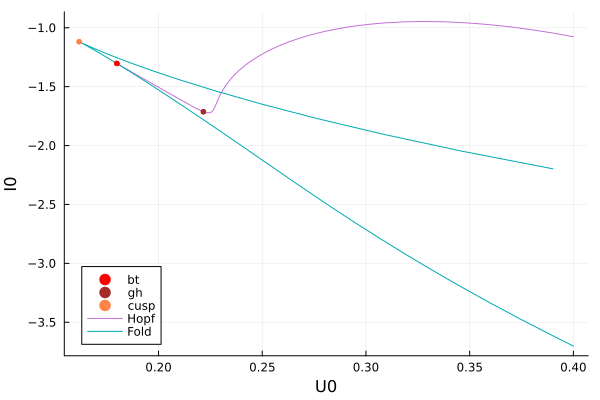

In [15]:
plot(hp_codim2_1, sn_codim2_1, branchlabel = ["Hopf", "Fold"])

In [16]:
############
# try to get better precision on BT point
solbt = newton(hp_codim2_1, 2; options = NewtonPar(hp_codim2_1.contparams.newtonOptions, verbose = true));

@set! hp_codim2_1.specialpoint[2].param = solbt.u.params.U0
@set! hp_codim2_1.specialpoint[2].printsol.I0 = solbt.u.params.I0
@set! hp_codim2_1.specialpoint[2].printsol.U0 = solbt.u.params.U0
hp_codim2_1.specialpoint[2].x[1:3] .= solbt.u.x0


‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Newton step         residual     linear iterations  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§


‚îÇ       0     ‚îÇ       8.9710e-03     ‚îÇ        0       ‚îÇ


‚îÇ       1     ‚îÇ       8.4979e-06     ‚îÇ        1       ‚îÇ
‚îÇ       2     ‚îÇ       1.1459e-10     ‚îÇ        1       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

3-element view(::Vector{Float64}, 1:3) with eltype Float64:
 5.011552798144044
 0.8373577959557607
 0.8430777838478387

In [17]:
# predictors from the BT normal form. These are by no means accurate!
btpt = getNormalForm(hp_codim2_1, 2; nev = 3, autodiff = false)
Hom = BK.predictor(btpt, Val(:HomoclinicCurve), 0.01)
_S = LinRange(-0.25, 0.55, 1000)
plot(hp_codim2_1)
plot!([Hom.Œ±(s)[2] for s in _S], [Hom.Œ±(s)[1] for s in _S], linewidth=5, label = "Hom curve predictor")

# plot of the homoclinic orbit
hom1 = [Hom.orbit(t,0.1)[1] for t in LinRange(-1000, 1000, 10000)]
hom2 = [Hom.orbit(t,0.1)[2] for t in LinRange(-1000, 1000, 10000)]
plot(hom1, hom2, title = "predictor for Hom. solution", label = "")
############

btpt = getNormalForm(hp_codim2_1, 2; nev = 3, autodiff = false)

Bogdanov-Takens bifurcation point at (:I0, :U0) ‚âà (-1.3029782305886362, 0.179886463252328).
Normal form (B, Œ≤1 + Œ≤2‚ãÖB + b‚ãÖA‚ãÖB + a‚ãÖA¬≤)
Normal form coefficients:
 a = -21.32553578686826
 b = -0.9238861078895382

You can call various predictors:
 - predictor(::BogdanovTakens, ::Val{:HopfCurve}, ds)
 - predictor(::BogdanovTakens, ::Val{:FoldCurve}, ds)
 - predictor(::BogdanovTakens, ::Val{:HomoclinicCurve}, ds)


In [18]:
using HclinicBifurcationKit

function plotHom(x,p;k...)
    ùêáùê®ùê¶ = p.prob
    par0 = set(BK.getParams(ùêáùê®ùê¶), BK.getLens(ùêáùê®ùê¶), x.x[end][1])
    par0 = set(par0, p.lens, p.p)
    sol = getHomoclinicOrbit(ùêáùê®ùê¶, x, par0)
    m = (ùêáùê®ùê¶.bvp isa PeriodicOrbitOCollProblem && ùêáùê®ùê¶.bvp.meshadapt) ? :d : :none
    plot!(sol.t, sol[1,:],subplot=3, markersize = 1, marker=m)
    # plot!(sol[1,:], sol[2,:],subplot=3, markersize = 1, marker=m)
end

# using DifferentialEquations
# probsh = ODEProblem(TM_bk!, copy(btpt.x0), (0., 100.), p_tm; abstol = 1e-12, reltol = 1e-10)
# sol = solve(probsh, Rodas5())
# plot(sol, vars=(:t,1))

plotHom (generic function with 1 method)

In [ ]:
opts_con_hom = @set opts_con.newtonOptions.verbose = true
@set! opts_con_hom.newtonOptions.maxIter = 15
br_hom_c = continuation(
        prob,
        btpt,
        # we use mesh adaptation
        PeriodicOrbitOCollProblem(150, 4; meshadapt = false, K = 500),
        PALC(tangent = Bordered()),
        setproperties(opts_con_hom, maxSteps = 130, saveSolEveryStep = 1, dsmax = 3e-2, plotEveryStep = 1, pMin = -1.01, pMax = 0.4, ds = 0.0001, detectEvent = 2, detectBifurcation = 0);
        verbosity = 1, plot = true,
        œµ0 = 1e-8, amplitude = 1e-3,
        freeparams = ((@lens _.œµ0), (@lens _.œµ1)),
        plotSolution = plotHom,
        callbackN = BK.cbMaxNorm(1e0),
        )